In [1]:
import tensorflow.keras as keras
import pandas as pd

train_df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\sign_mnist_train.csv")
valid_df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\sign_mnist_valid.csv")

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

x_train = x_train / 255
x_valid = x_valid / 255


x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

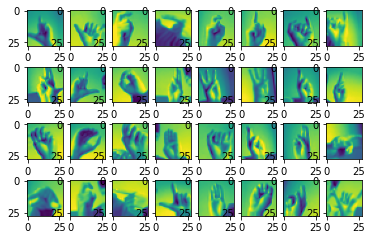

In [4]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()


In [5]:
datagen.fit(x_train)

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)//batch_size,  # Use integer division
          validation_data=(x_valid, y_valid))


Epoch 1/10
857/857 [==============================] - 150s 173ms/step - loss: 1.0775 - accuracy: 0.6502 - val_loss: 0.4678 - val_accuracy: 0.8440
Epoch 2/10
857/857 [==============================] - 142s 166ms/step - loss: 0.3127 - accuracy: 0.8946 - val_loss: 0.2543 - val_accuracy: 0.9133
Epoch 3/10
857/857 [==============================] - 153s 179ms/step - loss: 0.1954 - accuracy: 0.9360 - val_loss: 0.2370 - val_accuracy: 0.9081
Epoch 4/10
857/857 [==============================] - 175s 205ms/step - loss: 0.1518 - accuracy: 0.9502 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 5/10
857/857 [==============================] - 135s 158ms/step - loss: 0.1279 - accuracy: 0.9594 - val_loss: 0.1015 - val_accuracy: 0.9672
Epoch 6/10
857/857 [==============================] - 155s 181ms/step - loss: 0.1044 - accuracy: 0.9666 - val_loss: 0.2022 - val_accuracy: 0.9484
Epoch 7/10
857/857 [==============================] - 106s 124ms/step - loss: 0.0954 - accuracy: 0.9694 - val_loss: 0.3732 -

In [8]:
model.save('asl_model.h5')

In [9]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}